Accuracy :  0.99
Confusion Matrix :  [[237   1]
 [  2  60]]
Classification Report :                precision    recall  f1-score   support

           0       0.99      1.00      0.99       238
           1       0.98      0.97      0.98        62

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



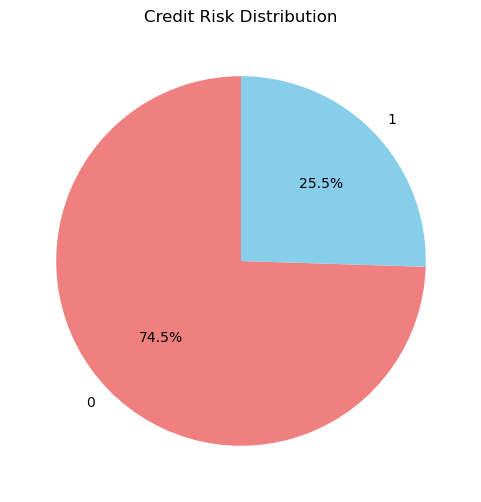

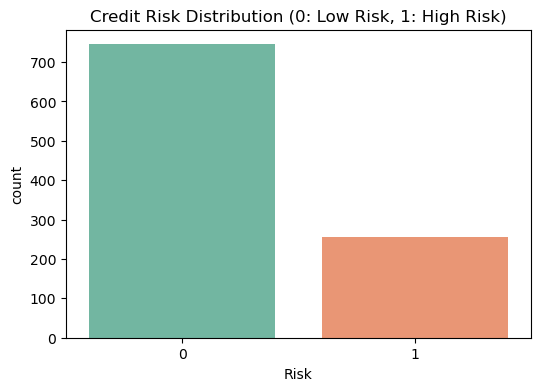

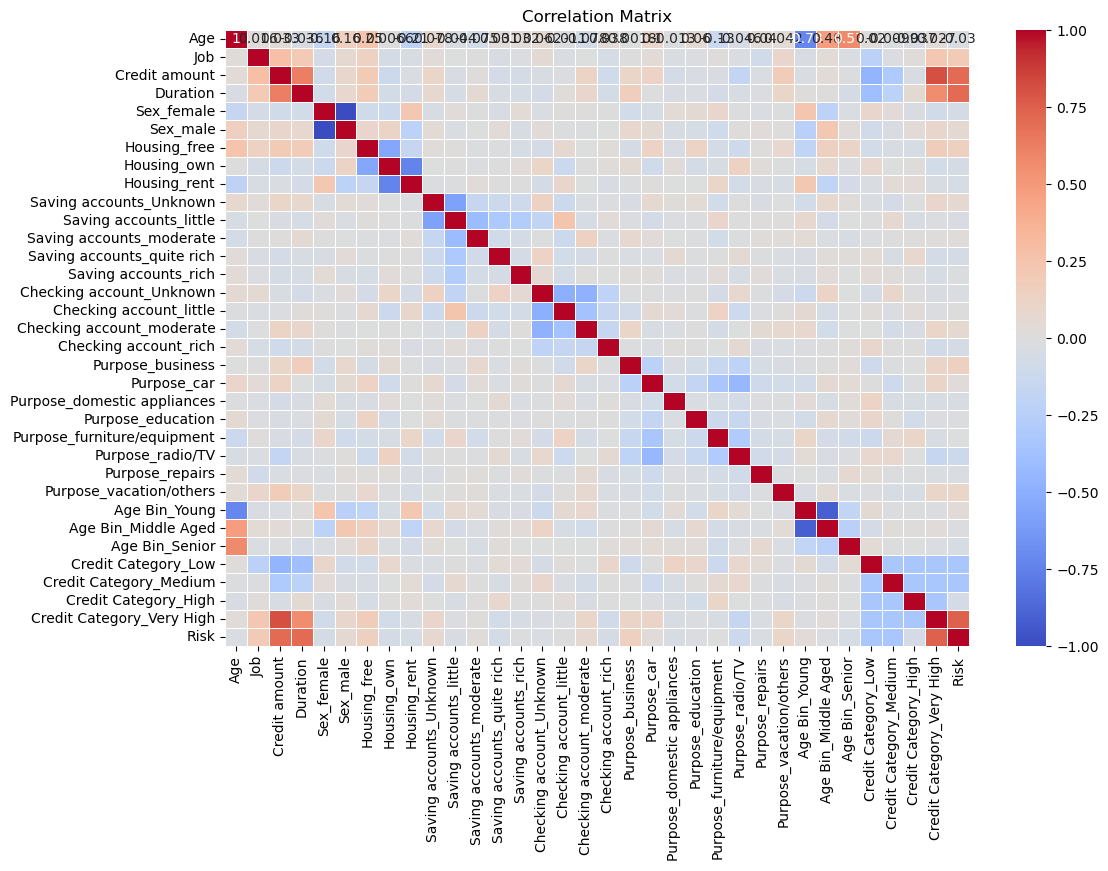

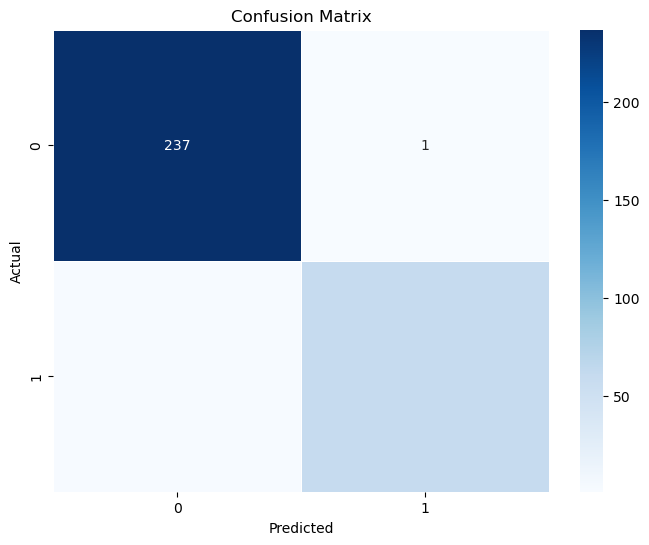

In [11]:
## CREDIT RISK ASSESSMENT
# Hi there, I've built this project for the sole reason of guidance for those who're willing to practice and/or learn Data Science. 
# This project is of intermediate level, so read the section break comments carefully so as to not lose track of what you're learning.
# The project utilises Random Forest Classifier (RFC) heavily since it is well-suited for binary classification tasks, like the one below.
# RFC is also robust to overfitted segments of data and works well with mixed data types.
# WARNING: Before you begin building this project, take a look at the libraries I've imported so as to not have any doubts.

## 0> Importing Libraries
# ----------------------------------------
# Import libraries for data handling, visualization, and model training.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc

# Loading the dataset
# ----------------------------------------
# The dataset used in this project is the German credit dataset. It contains attributes such as age, housing, and savings accounts
# for individuals applying for credit. The objective is to predict whether a person is a high or low credit risk.
credit_data = pd.read_csv('/Users/shyam/Desktop/Pypy/projects/Credit Risk Assessment/german_credit_data.csv')

# 1> Data Cleaning
# ----------------------------------------
# Drop the 'Unnamed: 0' column as it is unnecessary and doesn’t contribute to the analysis.
# Fill missing values in 'Saving accounts' and 'Checking account' with 'Unknown'. 
# This is to handle missing data without losing information by imputing a placeholder.
credit_data = credit_data.drop(columns=['Unnamed: 0'])
credit_data['Saving accounts'].fillna('Unknown', inplace=True)
credit_data['Checking account'].fillna('Unknown', inplace=True)

# 2> Feature Engineering
# ----------------------------------------
# Create new features to improve model predictions.
# Binning the 'Age' variable into categories for better interpretability (Young, Middle Aged, Senior).
credit_data['Age Bin'] = pd.cut(credit_data['Age'], bins=[18, 30, 60, 100], labels=['Young', 'Middle Aged', 'Senior'])

# Creating credit amount categories based on quartiles for a more structured classification of credit levels.
credit_data['Credit Category'] = pd.qcut(credit_data['Credit amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# One-hot encode categorical variables like 'Sex', 'Housing', 'Saving accounts', 'Checking account', and 'Purpose'.
# This converts categorical values into a numerical form, which is necessary for machine learning models.
credit_data = pd.get_dummies(credit_data, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Age Bin', 'Credit Category'])

# 3> Defining Target Variable (Risk)
# ----------------------------------------
# The target variable 'Risk' is defined as 1 if both 'Credit amount' and 'Duration' exceed their respective means.
# This indicates a higher likelihood of risk. 0 indicates low risk.
credit_data['Risk'] = (credit_data['Credit amount'] > credit_data['Credit amount'].mean()) & (credit_data['Duration'] > credit_data['Duration'].mean())
credit_data['Risk'] = credit_data['Risk'].astype(int)

# 4> Splitting Data
# ----------------------------------------
# Split the data into features (X) and target (y).
# Drop the target variable 'Risk' from the feature set X.
X = credit_data.drop(columns=['Risk'])
y = credit_data['Risk']

# Split the dataset into training (70%) and testing (30%) sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5> Scaling Data
# ----------------------------------------
# Scale numerical features ('Age', 'Credit amount', 'Duration') to have zero mean and unit variance.
# This helps improve the performance of the model by ensuring the features are on the same scale.
scaler = StandardScaler()
num_cols = ['Age', 'Credit amount', 'Duration']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 6> Initializing the Random Forest Classifier (RFC)
# ----------------------------------------
# Random Forest Classifier is a popular and powerful ensemble method that is well-suited for binary classification tasks.
# We initialize the model with 100 trees (n_estimators=100).
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Fit the model to the training data

# Use the trained model to predict the 'Risk' on the test set.
y_pred = model.predict(X_test)

# 7> Model Evaluation
# ----------------------------------------
# Evaluate the model using accuracy, confusion matrix, and classification report.
# These metrics will help you understand how well the model is performing in predicting credit risk.
accuracy = accuracy_score(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
c_report = classification_report(y_test, y_pred)

# Print model performance metrics
print('Accuracy :', accuracy)
print('Confusion Matrix :\n', c_matrix)
print('Classification Report :\n', c_report)

## 8> Visualization of Data and Results
# ----------------------------------------
# Pie chart for 'Risk' distribution to see the proportion of high-risk vs low-risk applicants.
plt.figure(figsize=(6, 6))
credit_data['Risk'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Credit Risk Distribution')
plt.ylabel('')
plt.show()

# Bar plot to show the count of low-risk (0) vs high-risk (1) applicants.
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk', data=credit_data, palette='Set2')
plt.title('Credit Risk Distribution (0: Low Risk, 1: High Risk)')
plt.show()

# Predict probabilities for the ROC curve or other probability-based evaluations.
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Correlation heatmap to visualize relationships between features.
plt.figure(figsize=(12, 8))
sns.heatmap(credit_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Confusion matrix heatmap to better visualize model predictions and errors.
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion:
# The Random Forest Classifier was used to predict credit risk with decent accuracy.
# We used visualizations to gain insights into data distribution, relationships, and model performance.
# Potential improvements include hyperparameter tuning or using other classification models to compare performance.

# If you have any doubts about the project, feel free to mail me at shyam9214563063@gmail.com. Cheers!!
